In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd

sns.set_theme()

In [107]:
df = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_rotated_tasks/Naive_Task_Aware_2022_07_23_02:37:26/cifar10_smallconv_singlehead_rotated_tasks.csv")
df = df.filter(['m', 'r', '0', '10', '45', '90', '135'])

In [68]:
# df1 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_rotated_tasks/cifar10_wrn_singlehead_rotated_tasks_1.csv")
# df2 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_rotated_tasks/cifar10_wrn_singlehead_rotated_tasks_2.csv")
# # df = df.filter(['m', 'r', '0', '10', '45', '90', '135'])
# df1 = df1.filter(['m', 'r', '135'])
# df2 = df2.filter(['m', 'r', '135'])

In [70]:
# df = pd.concat([df1, df2], ignore_index=True)

In [108]:
dfm = df.melt(['m', 'r'], var_name='Alpha', value_name='Risk')

Text(0.5, 0, '$m/n, n = 100$')

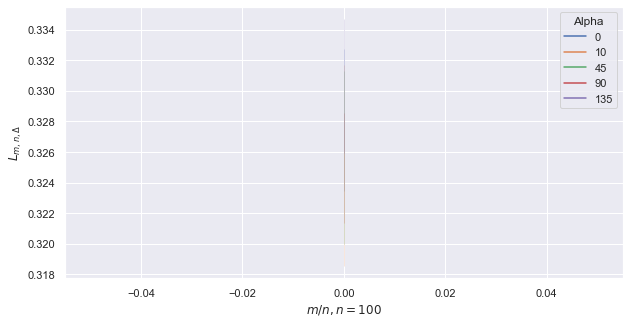

In [109]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white')
ax = sns.lineplot(data=dfm, x="m", y="Risk", hue="Alpha", ax=ax, markers=True, ci=95, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n = 100$")
# ax.set_xlim([0, 1])
# ax.set_ylim([0.30, 0.40])

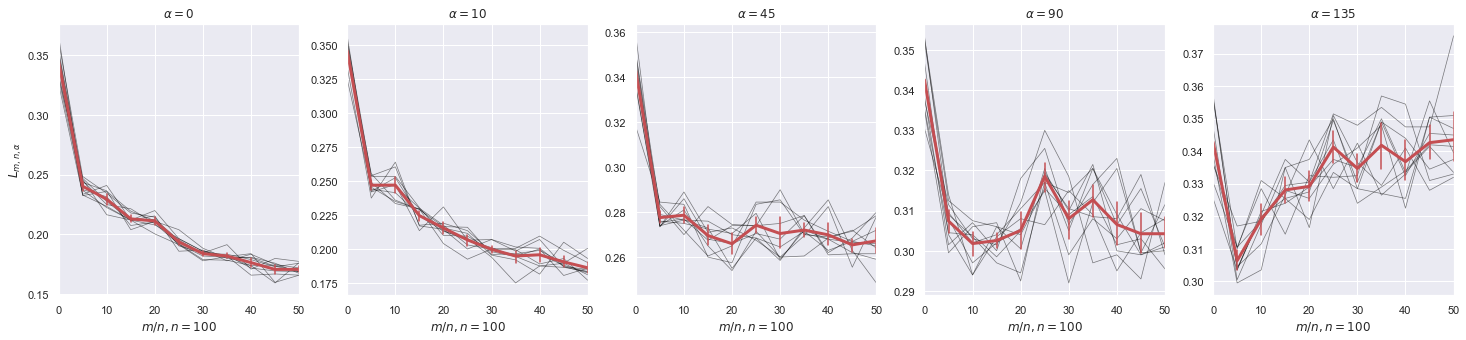

In [55]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5), facecolor='white')
axs = axs.ravel()
Alpha = [0, 10, 45, 90, 135]
for i, alpha in enumerate(Alpha):
    ax = sns.lineplot(data=df, x="m", y=str(alpha), hue="r", palette=sns.color_palette(['black'], len(df["r"].unique())), ax=axs[i], estimator=None, lw=0.7, alpha=0.5, legend=False)
    ax = sns.lineplot(data=df, x="m", y=str(alpha), ax=ax, markers=True, color='r', err_style="bars", lw=3)
    ax.set_title(r"$\alpha = {}$".format(str(alpha)))
    ax.set_xlabel("")
    ax.set_ylabel("")
    if i == 0:
        ax.set_ylabel(r"$L_{m, n, \alpha}$")
    ax.set_xlabel(r"$m/n, n=100$")
    ax.set_xlim([0, 50])

In [56]:
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/rotated_BvC_reps.svg", bbox_inches="tight")

___


In [103]:
filename = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_rotated_tasks/Naive_Task_Aware_2022_07_22_07:16:54/cifar10_smallconv_singlehead_rotated_tasks.csv"
df = pd.read_csv(filename)
df = df.filter(['m', 'r', '135'])

In [104]:
filename = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_rotated_tasks/Optimal_Task_Aware_2022_07_23_02:59:40/cifar10_smallconv_singlehead_rotated_tasks.csv"
dfo = pd.read_csv(filename)
dfo = dfo.filter(['m', 'r', '135'])

In [55]:
# filename1 = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_rotated_tasks/Optimal_Task_Aware_2022_07_21_13:00:40/cifar10_smallconv_singlehead_rotated_tasks.csv"
# filename2 = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_rotated_tasks/Optimal_Task_Aware_2022_07_21_22:42:50/cifar10_smallconv_singlehead_rotated_tasks.csv"
# dfo1 = pd.read_csv(filename1)
# dfo2 = pd.read_csv(filename2)
# dfo = pd.concat([dfo1, dfo2], ignore_index=True)
# # dfo = dfo.filter(['m', 'r', '135'])
# dfo = dfo.filter(['m', 'r', '135_alpha'])

In [105]:
dfm = df.melt(['m', 'r'], var_name='Alpha', value_name='Risk')
dfom = dfo.melt(['m', 'r'], var_name='Alpha', value_name='Risk')

(0.0, 20.0)

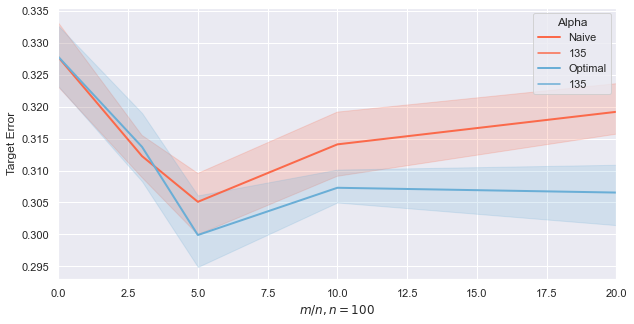

In [106]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white')
ax = sns.lineplot(data=dfm, x="m", y="Risk", hue="Alpha", ax=ax, markers=True, ci=95, lw=2, label='Naive', palette='Reds')
ax = sns.lineplot(data=dfom, x="m", y="Risk", hue="Alpha", ax=ax, markers=True, ci=95, lw=2, label='Optimal', palette='Blues')
ax.set_ylabel("Target Error")
ax.set_xlabel(r"$m/n, n = 100$")
ax.set_xlim([0, 20])

In [244]:
dfom = dfo.melt(['m', 'r'], var_name='Alpha', value_name='Risk')

(0.0, 50.0)

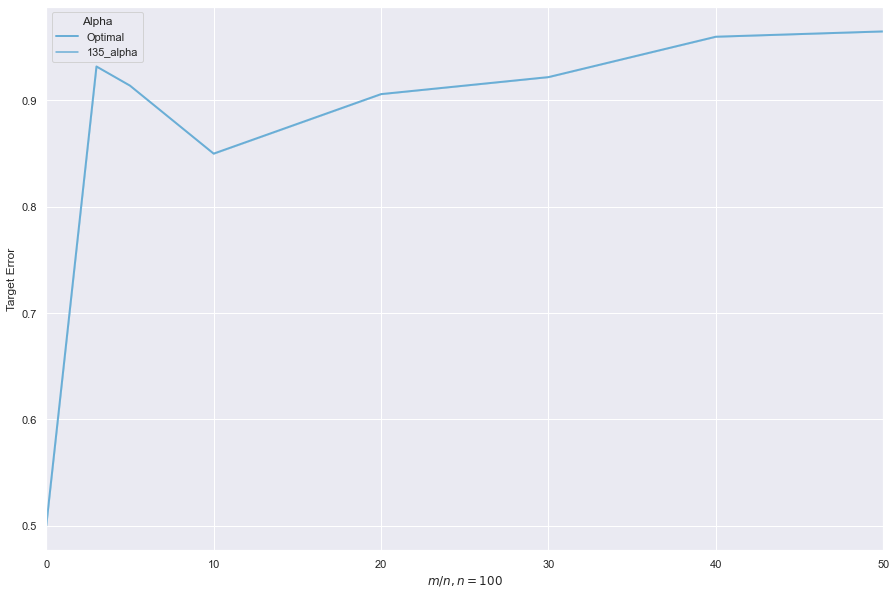

In [246]:
fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')
# ax = sns.lineplot(data=dfm, x="m", y="Risk", hue="Alpha", ax=ax, markers=True, ci=95, lw=2, label='Naive', palette='Reds')
ax = sns.lineplot(data=dfom, x="m", y="Risk", hue="Alpha", ax=ax, markers=True, ci=95, lw=2, label='Optimal', palette='Blues')
ax.set_ylabel("Target Error")
ax.set_xlabel(r"$m/n, n = 100$")
ax.set_xlim([0, 50])

---

In [201]:
filename = "cifar10_wrn_multihead_dual_tasks_[6, 7]_[2, 3]"

In [202]:
df = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename))

In [203]:
n = 100
df["m"] = df["m"]/n

In [204]:
del df["Unnamed: 0"]

In [205]:
dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

(0.11979999999999988, 0.2452)

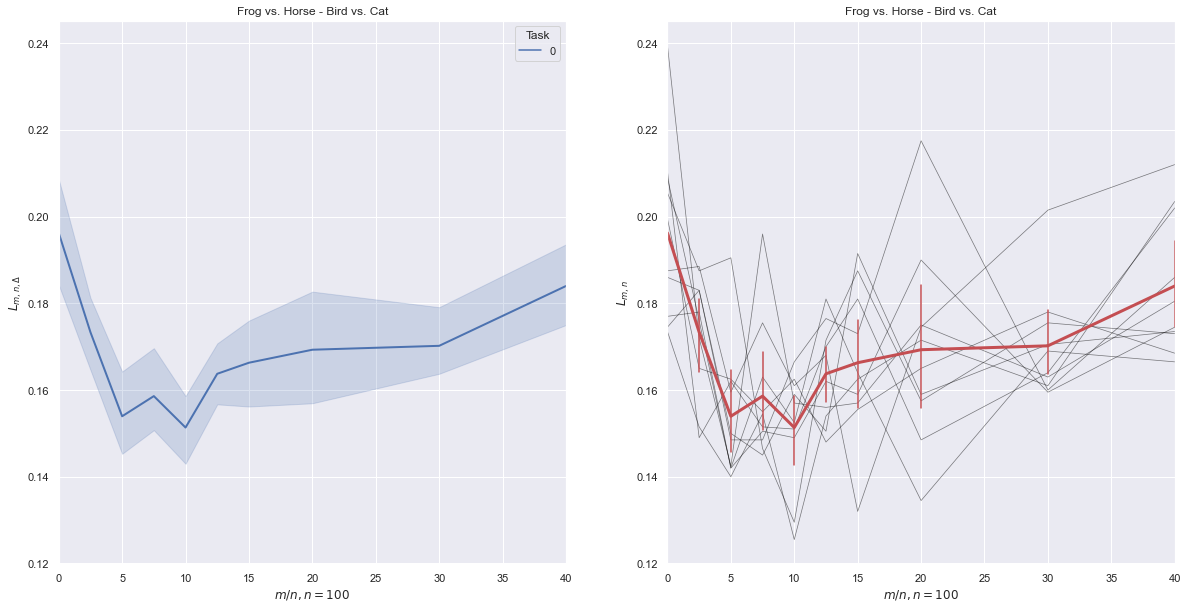

In [215]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), facecolor='white')

ax = sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=axs[0], markers=True, ci=95, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n = 100$")
ax.set_xlim([0, 40])
ax.set_title("Frog vs. Horse - Bird vs. Cat")

ax = sns.lineplot(data=df, x="m", y=str(0), hue="r", palette=sns.color_palette(['black'], len(df["r"].unique())), ax=axs[1], estimator=None, lw=0.7, alpha=0.5, legend=False)
ax = sns.lineplot(data=df, x="m", y=str(0), ax=ax, markers=True, color='r', err_style="bars", lw=3)
ax.set_ylabel(r"$L_{m, n}$")
ax.set_xlim([0, 40])
ax.set_ylabel(r"$L_{m, n}$")
ax.set_xlabel(r"$m/n, n=100$")
ax.set_title("Frog vs. Horse - Bird vs. Cat")

axs[0].set_ylim(ax.get_ylim())

In [216]:
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/{}.svg".format(filename), bbox_inches="tight")

---

In [4]:
filename1 = "cifar10_WideResNet_multihead_larger_m/cifar10_wrn_multihead_dual_tasks_T1"
filename2 = "cifar10_WideResNet_multihead_larger_m/cifar10_wrn_multihead_dual_tasks_T2"
filename3 = "cifar10_WideResNet_multihead_larger_m/cifar10_wrn_multihead_dual_tasks_T3"
filename4 = "cifar10_WideResNet_multihead_larger_m/cifar10_wrn_multihead_dual_tasks_T4"
filename5 = "cifar10_WideResNet_multihead_larger_m/cifar10_wrn_multihead_dual_tasks_T5"

In [5]:
df1 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename1))
df2 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename2))
df3 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename3))
df4 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename4))
df5 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename5))

In [314]:
# n = 100
# df1["m"] = df1["m"]/n
# df2["m"] = df2["m"]/n
# df3["m"] = df3["m"]/n
# df4["m"] = df4["m"]/n
# df5["m"] = df5["m"]/n

In [6]:
dfs = [df1, df2, df3, df4, df5]

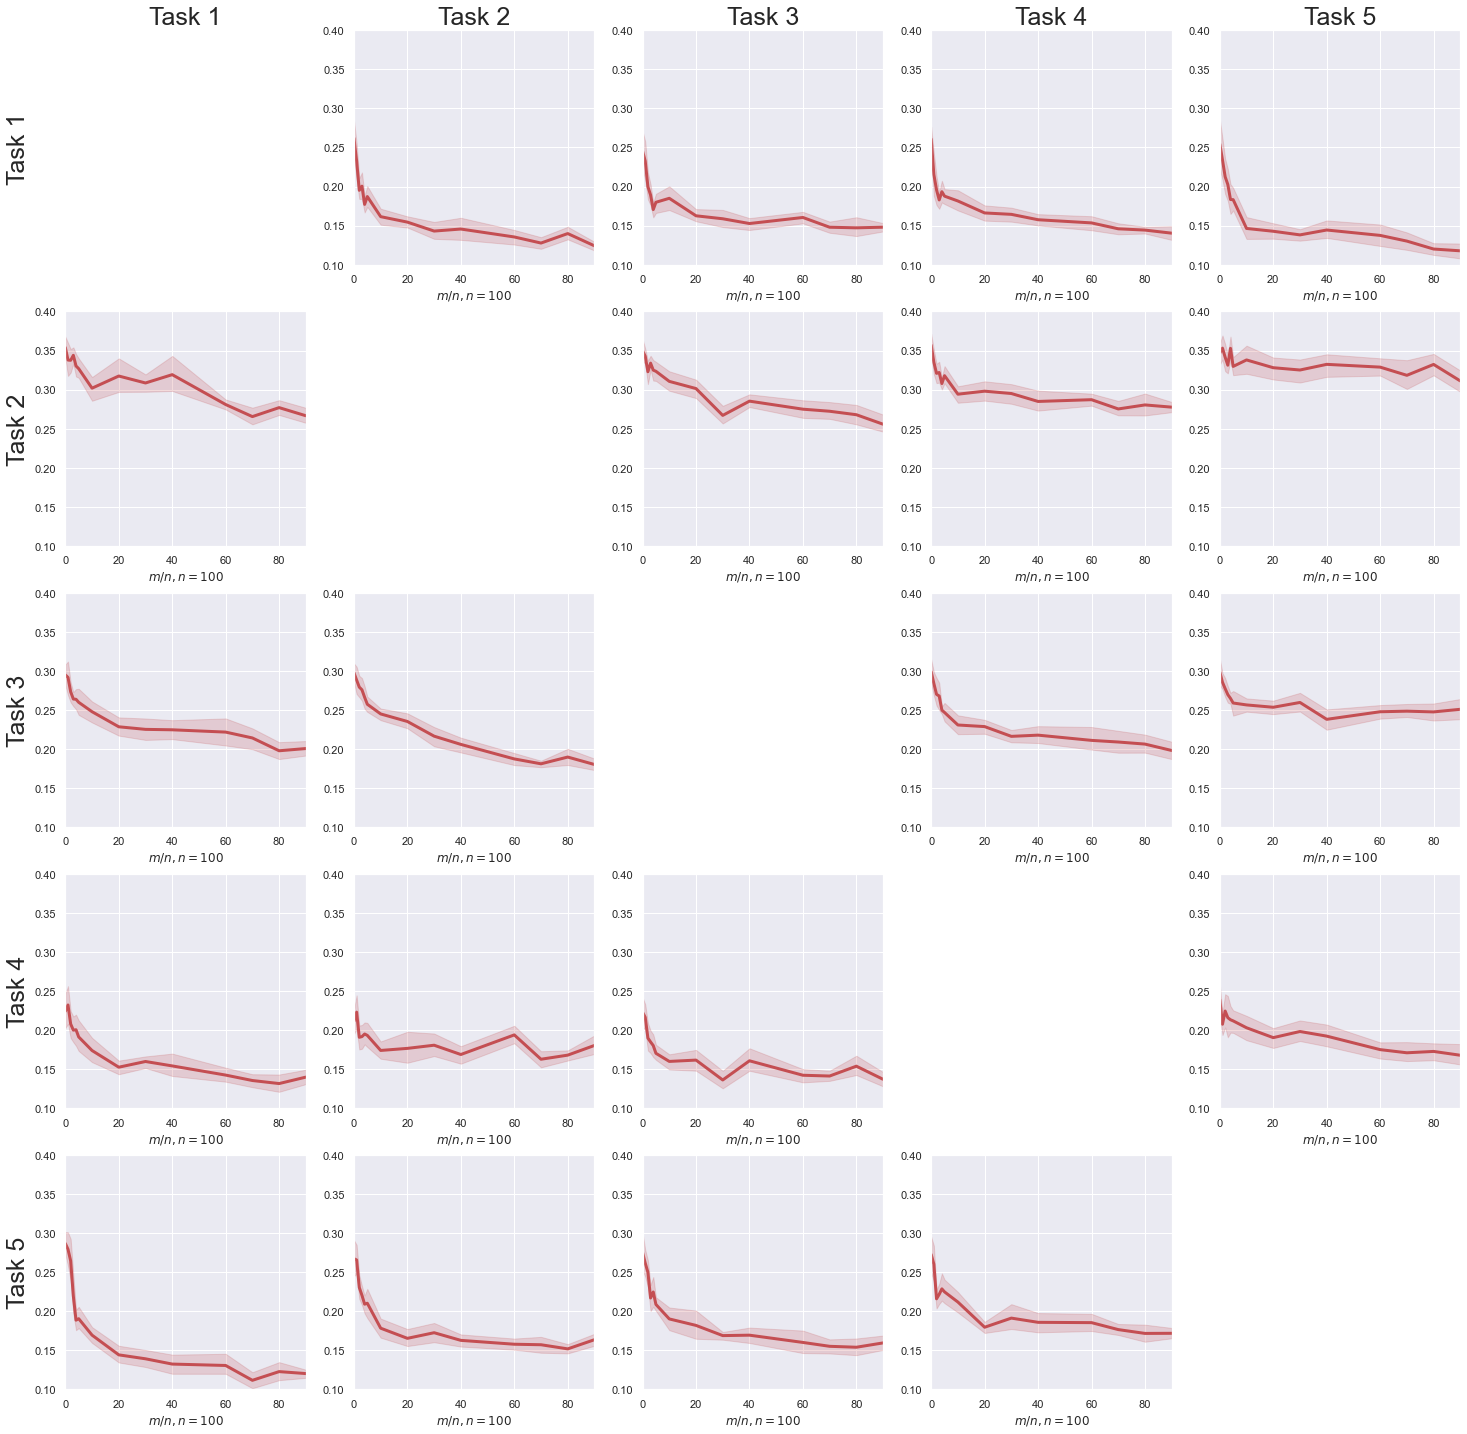

In [7]:
fig, axs = plt.subplots(5, 5, figsize=(25, 25), facecolor='white')
for i, df in enumerate(dfs):
    for j in range(5):
        axs[i][j].set_ylabel(" ")
        if i == 0:
            axs[i][j].set_title("Task {}".format(j+1), fontsize=25)
        if j == 0:
            axs[i][j].set_ylabel("Task {}".format(i+1), fontsize=25)
        if j == i:
            axs[i][j].axis('off')
            if i == 0: 
                axs[i][j].axis('on')
                axs[i][j].set_ylabel("Task 1",fontsize=25)
                axs[i][j].xaxis.set_visible(False)
                axs[i][j].patch.set_visible(False)
                axs[i][j].set_ylim([0.10, 0.36])
                axs[i][j].tick_params(axis='y', colors='white')
            continue
        ax = sns.lineplot(data=df, x="m", y=str(j+1), ax=axs[i][j], markers=True, color='r', lw=3)
        ax.set_xlim([0, 90])
        ax.set_ylim([0.10, 0.40])
        ax.set_xlabel(r"$m/n, n=100$")

In [8]:
filename = "cifar_wrn_multihead_larger_m"
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/{}.svg".format(filename), bbox_inches="tight")

---

In [305]:
filename = "cifar10_SmallConv_singlehead_naive_v2/cifar10_smallconv_singlehead_dual_tasks_T1_T5"
df = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename))

In [306]:
filename = "cifar10_SmallConv_singlehead_naive/cifar10_smallconv_singlehead_dual_tasks_T1_T5"
df1 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename))
del df1["Unnamed: 0"]
del df1["alpha"]

In [307]:
del df["Unnamed: 0"]
del df["alpha"]

In [308]:
df["m"] = df["m"]*500
df1["m"] = df1["m"]*100

In [309]:
dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')
dfm1 = df1.melt(['m', 'r'], var_name='Task', value_name='Risk')

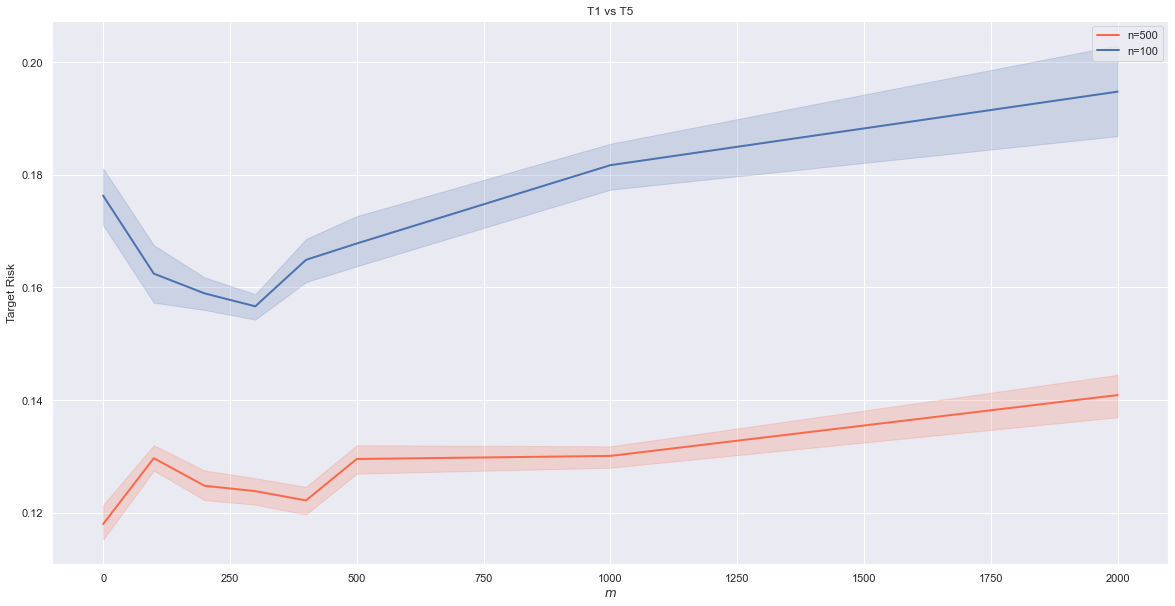

In [312]:
fig, ax = plt.subplots(figsize=(20, 10), facecolor='white')

ax = sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, markers=True, ci=95, lw=2, label="n=500", palette="Reds", legend=False)
ax = sns.lineplot(data=dfm1, x="m", y="Risk", hue="Task", ax=ax, markers=True, ci=95, lw=2, label="n=100", legend=False)
ax.set_ylabel("Target Risk")
ax.set_xlabel(r"$m$")
# ax.set_xlim([0, 90])
ax.set_title("T1 vs T5")
ax.legend()

# ax = sns.lineplot(data=df, x="m", y=str(5), hue="r", palette=sns.color_palette(['black'], len(df["r"].unique())), ax=axs[1], estimator=None, lw=0.7, alpha=0.5, legend=False)
# ax = sns.lineplot(data=df, x="m", y=str(5), ax=ax, markers=True, color='r', err_style="bars", lw=3)
# ax.set_ylabel(r"$L_{m, n}$")
# # ax.set_xlim([0, 90])
# ax.set_ylabel(r"$L_{m, n}$")
# ax.set_xlabel(r"$m/n, n=500$")
# ax.set_title("T1 vs T5")

# axs[0].set_ylim(ax.get_ylim())

---

In [43]:
filename = "cifar10_SmallConv_singlehead_optimal_v3/cifar10_smallconv_singlehead_dual_tasks_T2_T3"
df = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename))
del df["Unnamed: 0"]

In [44]:
filename = "cifar10_SmallConv_singlehead_naive_v2/cifar10_smallconv_singlehead_dual_tasks_T2_T3"
df1 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename))
del df1["Unnamed: 0"]
del df1["alpha"]
# del df1['1']
# del df1['3']
# del df1['4']

(0.5, 1.1)

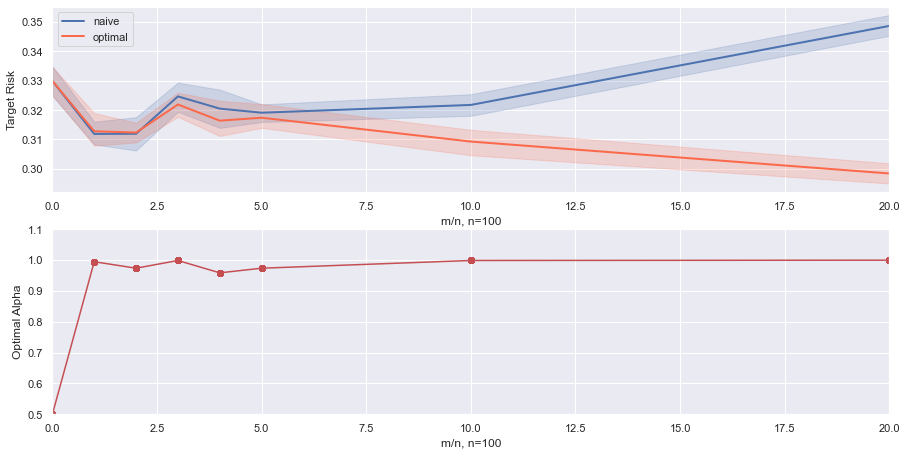

In [45]:
# risk = df['3']
alpha = df['alpha']
mn = df['m']
del df["alpha"]
dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')
dfm1 = df1.melt(['m', 'r'], var_name='Task', value_name='Risk')
fig, ax = plt.subplots(2, 1, figsize=(15, 7.5))
sns.lineplot(data=dfm1, x="m", y="Risk", hue="Task", ax=ax[0], markers=True, ci=95, lw=2, label="naive", legend=False)
sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax[0], markers=True, ci=95, lw=2, palette='Reds', label="optimal", legend=False)
ax[0].set_ylabel("Target Risk")
ax[0].set_xlabel(r"m/n, n=100")
ax[0].set_xlim([0, 20])
ax[0].legend()

ax[1].plot(mn, alpha, "ro-")
ax[1].set_ylabel("Optimal Alpha")
ax[1].set_xlabel(r"m/n, n=100")
ax[1].set_xlim([0, 20])
ax[1].set_ylim([0.5, 1.1])